This notebook follows the code laid out in the article: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

The aim of the article is to explain Shapley values, which are quantities that can be used in explainable machine learning models. Their calculation is most straight-forward in the context of a linear regression model. 

This next cell imports a housing price dataset from the shap package. A linear regression model is trained to predict the natural log of the median home price using the features in the dataset.

In [15]:
import ssl
import urllib.request

# Create an unverified SSL context to bypass certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

import sklearn
import shap
import matplotlib.pyplot as plt

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

In [16]:
# print head of dataset
print(X.head())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14740  4.1518      22.0  5.663073   1.075472      1551.0  4.180593     32.58   
10101  5.7796      32.0  6.107226   0.927739      1296.0  3.020979     33.92   
20566  4.3487      29.0  5.930712   1.026217      1554.0  2.910112     38.65   
2670   2.4511      37.0  4.992958   1.316901       390.0  2.746479     33.20   
15709  5.0049      25.0  4.319261   1.039578       649.0  1.712401     37.79   

       Longitude  
14740    -117.05  
10101    -117.97  
20566    -121.84  
2670     -115.60  
15709    -122.43  


In [17]:
# print summary statistics of dataset
print(X.describe())

            MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      3.797333    28.109000     5.445472     1.120013  1407.955000   
std       1.877360    12.576139     2.851739     0.582361   995.183757   
min       0.805400     2.000000     1.598131     0.571429    32.000000   
25%       2.509625    18.000000     4.363796     1.008379   794.000000   
50%       3.384100    28.000000     5.148000     1.049282  1188.000000   
75%       4.604925    37.000000     6.025256     1.098282  1722.000000   
max      15.000100    52.000000    50.837838    10.270270  9360.000000   

          AveOccup     Latitude    Longitude  
count  1000.000000  1000.000000  1000.000000  
mean      2.932862    35.660080  -119.582050  
std       0.882048     2.142337     2.014985  
min       1.161290    32.570000  -124.250000  
25%       2.425389    33.937500  -121.760000  
50%       2.810982    34.285000  -118.560000  
75% 

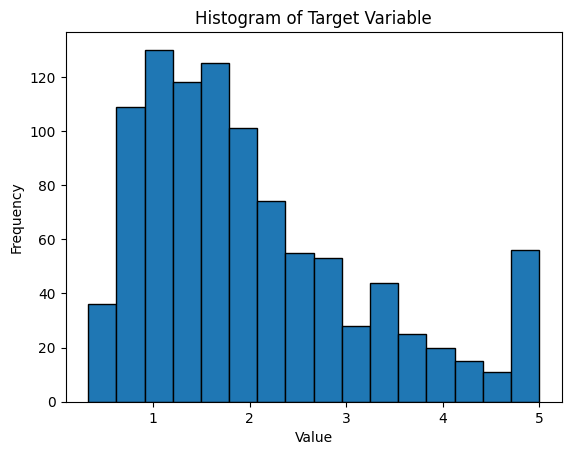

In [18]:
# print histogram of target variable
plt.hist(y, bins='auto', edgecolor='black') # 'auto' lets matplotlib choose optimal bins
plt.title('Histogram of Target Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


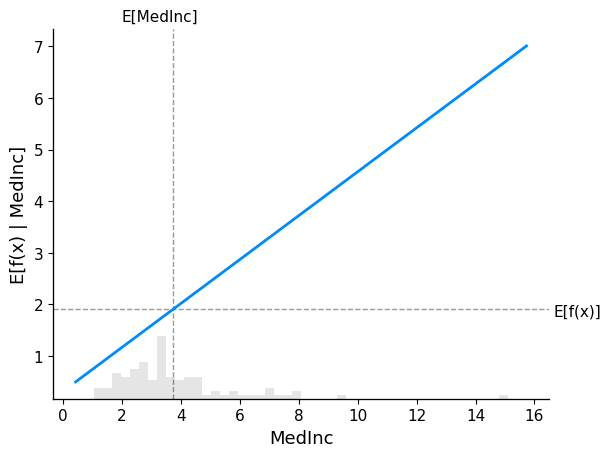

In [3]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

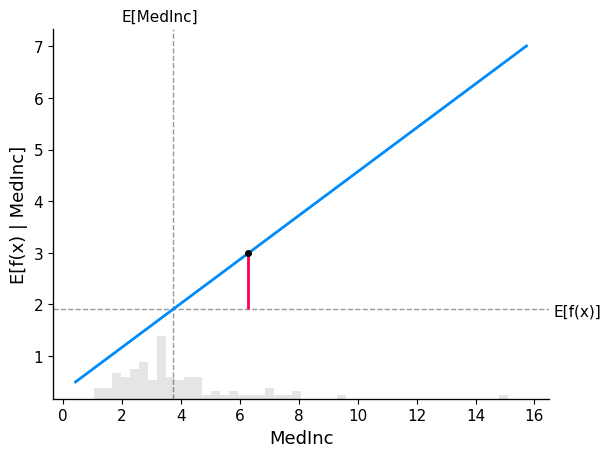

In [23]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 30
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

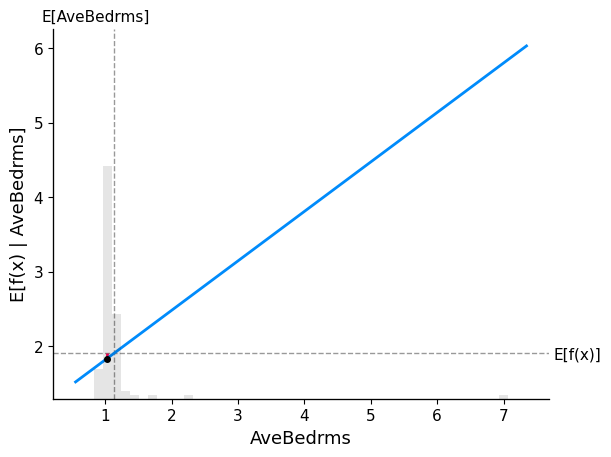

In [24]:
# make a standard partial dependence plot
sample_ind = 30
shap.partial_dependence_plot(
    "AveBedrms",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

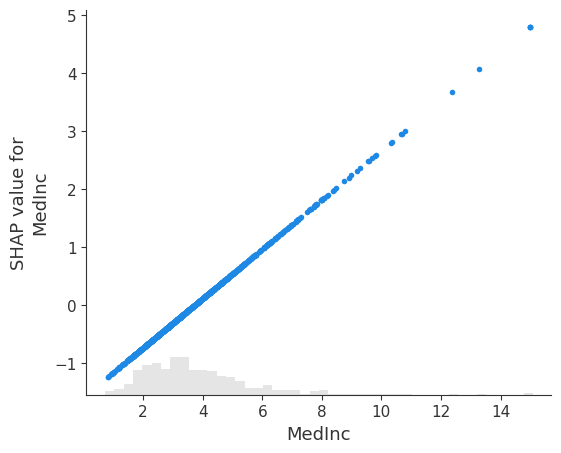

In [25]:
shap.plots.scatter(shap_values[:, "MedInc"])

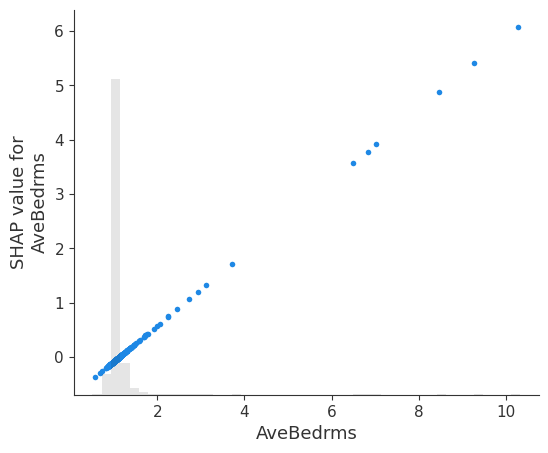

In [26]:
shap.plots.scatter(shap_values[:, "AveBedrms"])

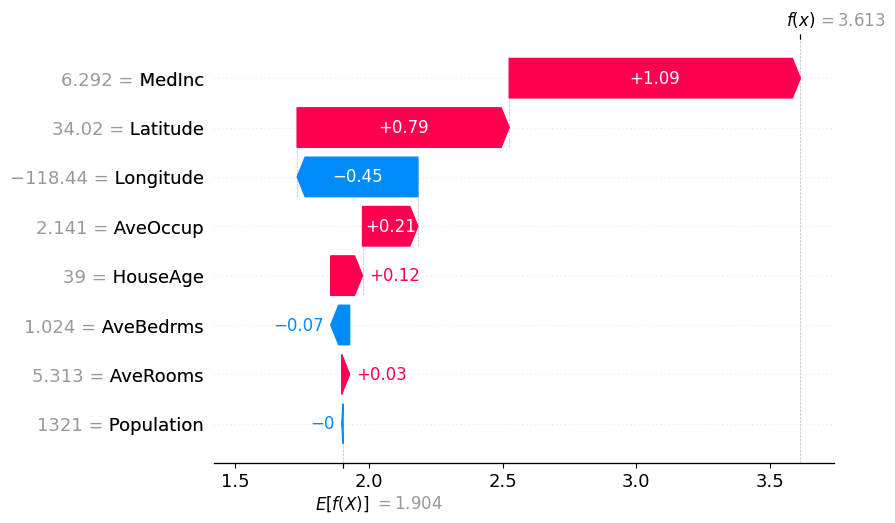

In [27]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)